### Linear Regression & Changing Climate

In [12]:
%store -r grand_marais_ann_temp_df

In [13]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt

# Common statistical plots for tabular data
import seaborn as sns

# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

# Import pandas for index
import pandas as pd

# Import holoviews as hv
import holoviews as hv

In [14]:
grand_marais_ann_temp_df.index.year.values

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int32)

In [15]:
### This code was created with the help of ChatGPT ###
# Drop rows where 'temp_c' is NaN
grand_marais_temp_clean = grand_marais_ann_temp_df.dropna(subset=['temp_c'])

# Getting the data in the correct format for scikit-learn
X = (
    grand_marais_temp_clean
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    #Reshape 'date' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = grand_marais_temp_clean['temp_c'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.001456158897980084
Intercept: 7.709545855066807


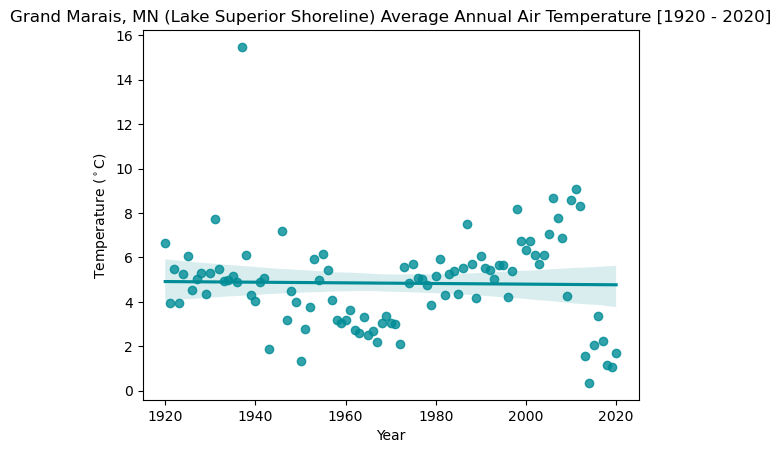

In [19]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=grand_marais_ann_temp_df.index.year, 
    y=grand_marais_ann_temp_df.temp_c,
    color='#008C96'
)
# Set plot labels
ax.set(
    title='Grand Marais, MN (Lake Superior Shoreline) Average Annual Air Temperature [1920 - 2020]',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)
# Display the plot without extra text
plt.show()